In [1]:
message = [line.rstrip() for line in open('SMSSpamCollection')]

In [3]:
print(len(message))

5574


In [4]:
for num,message in enumerate(message[:10]):
    print(num,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [5]:
import pandas as pd

In [6]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['Label','Message'])

In [8]:
messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Label      5572 non-null object
Message    5572 non-null object
dtypes: object(2)
memory usage: 130.6+ KB


In [11]:
messages.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages['Length'] = messages['Message'].apply(len)

In [14]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
messages.describe()

,Length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [18]:
messages.groupby('Label').describe()

Length
Label                   
ham   count  4825.000000
      mean     71.482487
      std      58.440652
      min       2.000000
      25%      33.000000
      50%      52.000000
      75%      93.000000
      max     910.000000
spam  count   747.000000
      mean    138.670683
      std      28.873603
      min      13.000000
      25%     133.000000
      50%     149.000000
      75%     157.000000
      max     223.000000

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

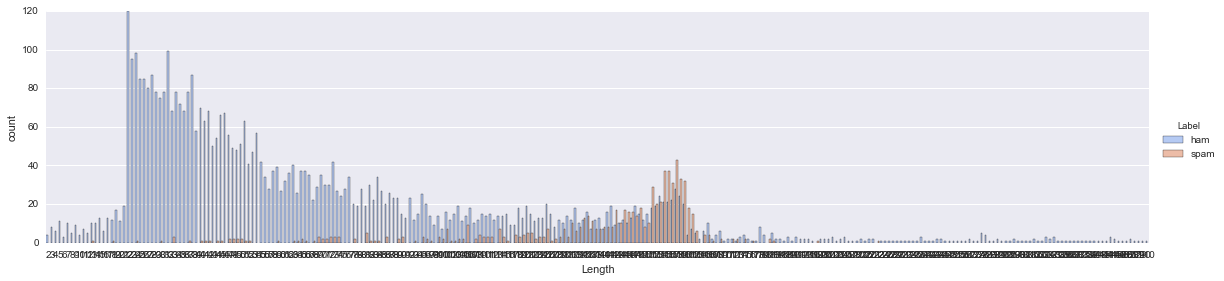

In [34]:
sns.factorplot('Length',data=messages,hue='Label',palette='coolwarm',kind='count',aspect=4)

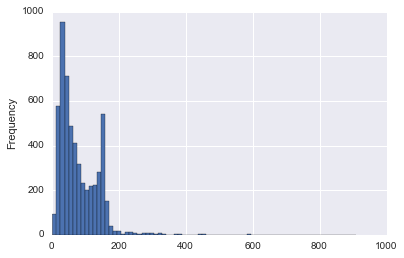

In [38]:
messages['Length'].plot(kind='hist',bins=75)

In [47]:
messages[messages['Length'] == 910]['Message'].iloc[0]


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E58A148F98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001E58A4DB128>], dtype=object)

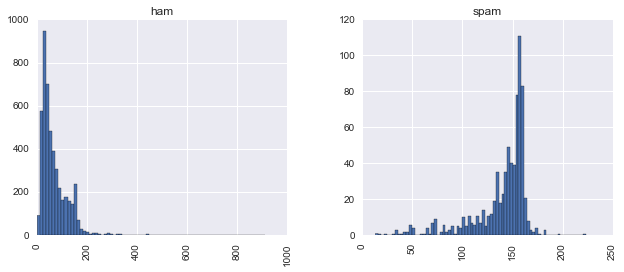

In [55]:
messages.hist(column ='Length',by='Label',bins=75,figsize=(10,4))

In [56]:
import string

In [62]:
sampleText = 'Hello, This is simple text message!!! Hope You like dis :)'
nopunc = [char for char in sampleText if char not in string.punctuation]

In [63]:
nopunc = ''.join(nopunc)

In [79]:
nopunc

'Hello This is simple text message Hope You like dis '

In [65]:
from nltk.corpus import stopwords

In [77]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [87]:
cleanText = [word for word in nopunc.split() if word not in stopwords.words('english')]

In [88]:
cleanText

['Hello', 'This', 'simple', 'text', 'message', 'Hope', 'You', 'like', 'dis']

In [89]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [90]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [92]:
messages['Message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['Message'])

In [96]:
print(len(bow_transformer.vocabulary_))

11444


In [98]:
message4 = messages['Message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [103]:
bow4 = bow_transformer.transform([message4])

In [104]:
print(bow4)
print(bow4.shape)

  (0, 4073)	2
  (0, 4638)	1
  (0, 5270)	1
  (0, 6214)	1
  (0, 6232)	1
  (0, 7197)	1
  (0, 9570)	2
(1, 11444)


In [106]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

U
say


In [107]:
messages_bow = bow_transformer.transform(messages['Message'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11444)
Amount of Non-Zero occurences:  50795
sparsity: 0.08%
